# Michael Lockhart - Privacy Task Sheet

Here I submit my code and notes for the privacy scientist role.

## Part 1

In [1]:
# Imports of modules for all sections of task 1
import pandas as pd
import numpy as np
from numpy import random # provided a better distribution than random randint and all possibilities were populated
import matplotlib.pyplot as plt
import seaborn as sns

## A) 
Randomly generate a dataset (dataframe) with eight columns and 50,000 rows. Each column should be a categorical variable (of arbitrary name) with three levels (of arbitrary names) in approximately equal proportions

In [2]:
# A function that simplifies the creation of a list of randomly assigned catagorical variables
def catagorical_maker(column, catagoricals, number_of_rows): 
    '''
    Returns a list of random catagoricals chosen from a 
    Inputs of a column name, list of names and total number required rows.
    
    catagorical_marker(column header string, catagorical value list, integer)
    
    '''
    # length of catagoricals for range
    number_of_catagoricals = (len(catagoricals)) 
    random_catagoricals_list = []
    # iterate over the total number of rows to generate a list of catagoricals
    for f in range(number_of_rows): 
        random_value = random.randint(0,number_of_catagoricals)
        random_catagoricals_list.append(catagoricals[random_value])
    return random_catagoricals_list

In [28]:
# A function to view how evenly matched the columns are
def column_counter(random_list_of_lists, rows):
    '''
    Return the frequency of each catagorical variable in a randomised list per category.
    
    column_counter([[],[],[]], integer)
    '''
    
    number_of_unique_catagories = len(set(random_list_of_lists[0]))
    exact_distribution = int(rows / number_of_unique_catagories)
    counts = []
    for x, f in enumerate(random_list_of_lists):
        counted = Counter(random_list_of_lists[x]).most_common()
        counts.append(counted)
        for position in range(len(counted)):
            difference = abs(exact_distribution - counted[position][1])
            percent = round(((difference/exact_distribution)*100),2)
            print(f"The randomly assigned value of {counted[position][0]} is {counted[position][1]}, {difference} ({percent}%) far away from the mean.")
    return counts

### Data generation

In [4]:
# A predefined dictionary of status that may be found in health data
status_catagoricals = {
                       'Status': ['Single', 'Married', 'Divorced'],
                       'Locations': ['North', 'Midlands', 'South'],
                       'Smokes': ['Yes', 'No', 'Infrequent'],
                       'Active': ['Yes', 'No', 'Variable'],
                       'Employment': ['Fill time', 'Contract', 'Unemployed'],
                       'Weight': ['Over weight', 'OK', 'Under weight'],
                       'Height': ['Tall', 'Short', 'Average'],
                       'Insured': ['Yes', 'No', 'Mixed']
                      }

# Iterating through the dictionary to generate a list of lists that can be converted to a Pandas data frame
random_lists = []
column_name = []
number_of_rows = 50000
# enumberating to obtain the column name for a column name list
for x, f in enumerate(status_catagoricals):
    # calling the function to generate the list for each key
    value = catagorical_maker(f, status_catagoricals[f], number_of_rows)
    random_lists.append(value)
    column_name.append(f)

# Generating the data frame using the random list and column names corresponding to the list
# The lists required transforming to a NumPy array in order to transpose to an 8 x 50000 data frame
transposed_list = np.array(random_lists).T
df = pd.DataFrame(transposed_list, columns = column_name)

## B)
Summarize the dataset so you can readily check whether you have achieved the goal set in a).

### Comments
While it appears that there have been appropriate random distributions of the categorical variables across each of the columns, some of the permutations available were not represented shown below with a count less than 3<sup>8</sup>.

In [5]:
# Here the frequency of each row is calculated
# Calculates the frequency of all column possibilities
temp1 = df.groupby(column_name).size()
# Resents the index to make to a single level
temp2 = temp1.reset_index() 
# Provides the column name 'Frequency'
frequency_df = temp2.rename(columns={0:'Frequency'}) 
# Could also have been combined to "frequency_df = df.groupby(column_name).size().reset_index().rename(columns={0:'count'})"

# Overall quick outputs of table
frequency_df.describe()

,Frequency
count,6559.000000
mean,7.623113
std,2.725982
min,1.000000
25%,6.000000
50%,7.000000
75%,9.000000
max,19.000000


In [6]:
#Checking each column for percentage representation
from collections import Counter
counted_column_catagoricals = column_counter(random_lists, number_of_rows)

The randomly assigned value of Single is 16740, 74 (0.44%) far away from the mean.
The randomly assigned value of Married is 16638, 28 (0.17%) far away from the mean.
The randomly assigned value of Divorced is 16622, 44 (0.26%) far away from the mean.
The randomly assigned value of North is 16914, 248 (1.49%) far away from the mean.
The randomly assigned value of Midlands is 16569, 97 (0.58%) far away from the mean.
The randomly assigned value of South is 16517, 149 (0.89%) far away from the mean.
The randomly assigned value of Yes is 16801, 135 (0.81%) far away from the mean.
The randomly assigned value of No is 16757, 91 (0.55%) far away from the mean.
The randomly assigned value of Infrequent is 16442, 224 (1.34%) far away from the mean.
The randomly assigned value of Yes is 16836, 170 (1.02%) far away from the mean.
The randomly assigned value of Variable is 16695, 29 (0.17%) far away from the mean.
The randomly assigned value of No is 16469, 197 (1.18%) far away from the mean.
The

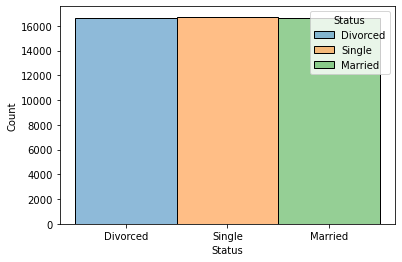

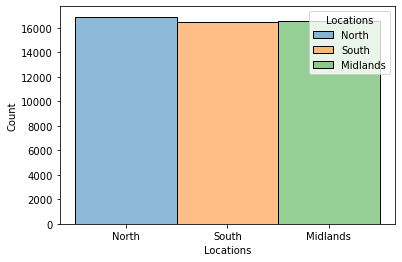

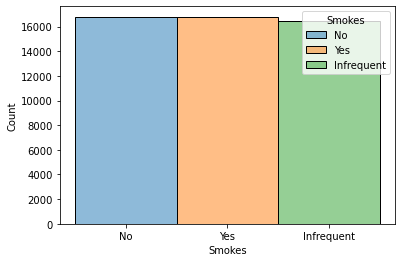

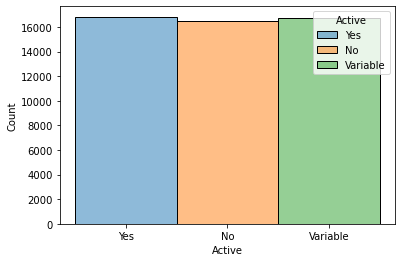

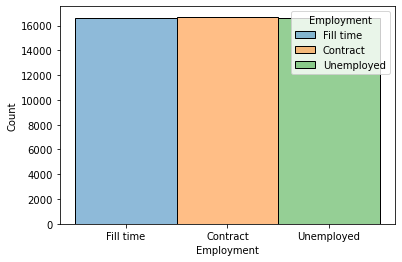

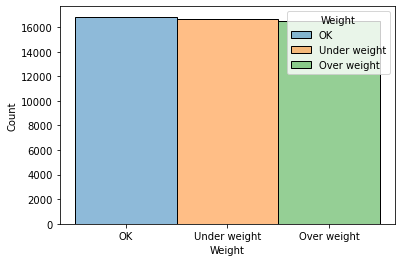

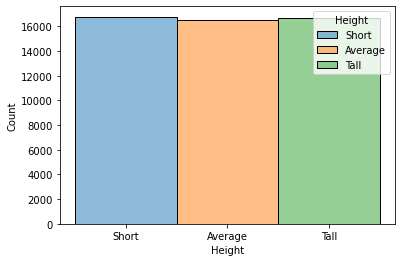

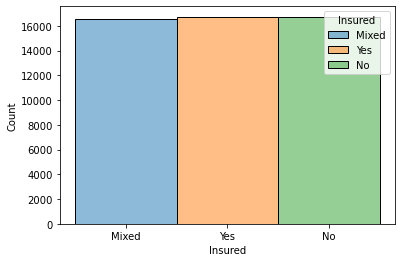

In [7]:
# Visualisation of catagory frequency
for f in column_name:
    sns.histplot(df, x=f, hue=f)
    plt.show()

The goups of histograms above show clearly that the catagories are well randomised.

## c)
How many unique rows (i.e., permutations of category levels) are possible?

### Answer
It is possible to produce 3<sup>8</sup> different combinations of catagorical variables = 6561.

In [8]:
total_possibilities = 3**8
print(f"The total number of category permutaions is {total_possibilities}.")

The total number of category permutaions is 6561.


## d)
Produce a table and appropriate graph which show the frequencies (numbers of groups)
by permutation group sizes up to group size of 12. That is, how many groups are unique
combinations (group size = 1), how many groups are made up of a pair of matching
combinations (group size = 2), how many groups are made up three the same, etc?

In [34]:
# Here the frequency of each row is calculated
# Calculates the frequency of all column possibilities
temp1 = df.groupby(column_name).size() 
# Resents the index to make to a single level
temp2 = temp1.reset_index()
# Provides the column name 'Frequency'
frequency_df = temp2.rename(columns={0:'Frequency'}) 
#frequency_df.head()
#frequency_df.describe()

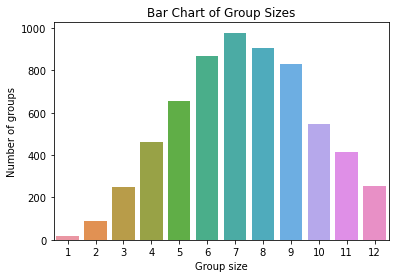

In [36]:
# The number of groups per group size are calculated in a similar manner to above
temp3 = frequency_df.groupby('Frequency').size()
temp4 = temp3.reset_index()
temp5 = temp4.rename(columns={0:'Number of groups', 'Frequency':'Group size'})
# The graph was cut off to the 12th group as per the instructions above
frequency_plot = sns.barplot(x='Group size', y='Number of groups', data=temp5.iloc[: 12]).set(title='Bar Chart of Group Sizes')
#temp5.describe()

## e)
Comment upon the distribution of group sizes in d).

### Answer
The distribution of the group sizes in part d) broadly represents a normal distribution, with a slight left skew, taking into account the data cut out. If the assignment of the categorical variables were close to random and the number of rows were higher this would represent a true normal distribution. Some group combinations are not represented with some smaller group sizes having low representation, potentially making them more identifiable. 

Below, the histogram of all frequency values for each of the (up to) 6561 unique permutations is displayed. The normal distribution is shown for the overall data when not grouped.

The total number of unique rows is 6559 rather than 6561.


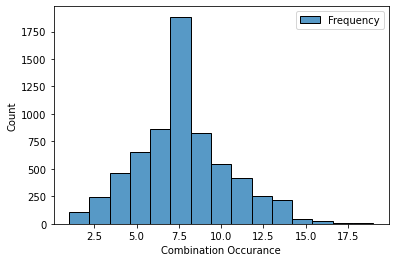

In [38]:
frequency_plot = sns.histplot(data=frequency_df, bins=15)
frequency_plot.set_xlabel("Combination Occurance")
frequency_df.describe()
print(f"The total number of unique rows is {len(frequency_df)} rather than {3**8}.")


## f)
If your random variables were, in fact, meaningful information on individuals, which
group sizes are of most concern from a privacy perspective?

### Answer
Given that the distribution is broadly normal, the tails of the histogram would be open to identification as they trail down to low group numbers. If one is to refer to k-anonymity, the values of k could be lower than the numbers shown on the tails of the data. 

## g)
Consider the effect of missing data in the dataset you created in Part a). How might
this complicate the production of a frequency table of group sizes in Part d)?

### Answer
Missing data would cause problems with the construction of the frequency table due to the lack of some value. This would mean the missing values would need to be treated in a way such as deletion, being replaced with an average, or predicted. For deletion the frequency table would likely overall decrease in group frequencies and remove some representation for the table overall. Given the data was generated randomly, but assuming this was real data the use of mean, median, mode would skew the results of a column if the randomness was biased in favour of one value. Prediction may be possible but as some of the groups are small, it would likely skew the data to higher population groups.

# Part 2

US health data frequently contains geographical information relating to a patient's
residential address. Typically (after some de-identiation steps) this may comprise
3-digit ZIP code and state. Some of these 3-digit ZIP codes (Table 3) have a relatively
small population, and the given advice is to recode all of these to 000.

<p style="text-align: center;"> <strong>Table 3</strong> - Three-digit ZIP codes with fewer than 20,000 residents </p>

| Code | Location |
| ---| ---|
|036 |Bellows Falls, VT|
|059 |St. Johnsbury East, VT|
|102 |New York: Main 3, NY|
|203 |Washington Govt. 2, DC|
|369 |Choctaw & Sumter Counties, AL|
|556 |Duluth East, MN|
|692 |Valentine, NE|
|821 |Yellowstone, WY|
|823 |Rawlins, WY|
|878 |Socorro, NM|
|879 |Truth or Consequences, NM|
|884 |Tucumcari, NM|
|893 |Ely, NV|

## a) 
Describe any shortcomings you can see with this approach.

### Answer
One potential short coming is that by changing all zip codes to the same value it could be clustered together for any analysis. By doing this there are distinct and sparse geographical locations that may in themselves be interesting to interrogate grouped together. 

## b)
Suggest a superior approach.

### Answer
One method to remove the last digit to isolate the location to the state but no further than this. This would allow localised clustering but not randomly distributed patient locale.

## c)
20,000 is a relatively high value. Why do you think it is so high?

### Answer
This value seems to be a high number but when we take into account the previous task of 50,000 rows of 8 attributes we saw that this does groups several larger groups together. For groups of over 20,000 it may be that this becomes a point at which anonymity for individuals on the data obtained becomes more difficult to track and isolate individuals. 

## d)
Why are residents of Fishers Island (to the east of New York City) particularly at risk
of re-identification in a typical health dataset, and how might this risk be effectively
reduced? [you will need to do a little research on Fishers Island for this question]

### Answer
Fishers Island, NY, is a small island. From information I have found from the 2020 census regarding demographics, education, age, sex, marital status and others, it is clear that by cross referencing almost any of the information it would be possible to identify low percentage individuals for each attribute of the census collected. For example, 100% of non-citizens were born in Latin America. This corresponds to only 4 individuals, which also correspond to 100% of the 0% educational attainment by race. For those around the island, it would be easy to identify personal information about these people. It may be prudent to combine this census block to a larger block group so that there is a higher probability of masking individuals though higher numbers of people being present. 

## e)
There may be no explicit patient geography included in a health dataset, yet included
are details of their healthcare provider(s), e.g., the name and address of their doctor's
surgery. Giving rationale, say to what degree this information may contribute to the
risk of re-identification of the patient?

### Answer
Many patients are required to register at their local doctors/healthcare providers surgery. Knowing the name of the surgery allows for someone to estimate the locale of all people registered within a certain distance. In most cases the healthcare providers limit the distance based off address and so knowing this information, which could be present on the healthcare providers website, this provides a quasi-identifier for re-identification.